<b>Code Imports</b>

In [392]:
%matplotlib inline

import math
import numpy as num
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits import mplot3d

<b>Lorenz Equations</b>
$$\frac{dx}{dt}=\sigma(y-x)$$
$$\frac{dy}{dt}=x(\rho - z) - y$$
$$\frac{dz}{dt}=xy-\beta z$$


<b>Lorenz System - RK4 Approximation</b> 

In [393]:
# Lorenz Values, modify values to modify system
# NOTE: Lorenz values are typically positive
# Lorenz Equations
Lx = lambda x,y,z: σ*(y - x)
Ly = lambda x,y,z: x*(ρ- z) - y
Lz = lambda x,y,z: x*y - β*z


In [394]:
def L(ω):
    # ω is an array containing values approximated values for x, y, z
    return Lx(ω[0],ω[1],ω[2]), Ly(ω[0],ω[1],ω[2]), Lz(ω[0],ω[1],ω[2])



# Specialized RK4 for Lorenz Equations

def L_RK4(a, b, α, N):
# INPUTS: Bounds a and b, initial values α, and sub-intervals N
# OUTPUTS: approximation of the functions fx, fy, fz
    h = (b-a)/N
    t = a
    ω = [α[0], α[1], α[2]]
    fx = [ω[0]]
    fy = [ω[1]]
    fz = [ω[2]]
    
    for j in range(1, N+1):
        # Initialize for use of k_Mult function
        
        k1x = h*Lx(ω[0],ω[1],ω[2])
        k1y = h*Ly(ω[0],ω[1],ω[2])
        k1z = h*Lz(ω[0],ω[1],ω[2])
        
        k2x = h*Lx(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
        k2y = h*Ly(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
        k2z = h*Lz(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
    
        k3x = h*Lx(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        k3y = h*Ly(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        k3z = h*Lz(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        
        k4x = h*Lx(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        k4y = h*Ly(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        k4z = h*Lz(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        # Print out respective k values
        
        # Recalculate ω for next iteration
        ω[0] = ω[0] + (k1x + 2*k2x + 2*k3x + k4x)/6;
        ω[1] = ω[1] + (k1y + 2*k2y + 2*k3y + k4y)/6;
        ω[2] = ω[2] + (k1z + 2*k2z + 2*k3z + k4z)/6;
        
        fx.append(ω[0])
        fy.append(ω[1])
        fz.append(ω[2])
        
    return fx, fy, fz


In [395]:
# range of t values
a = 0; b = 20
# initial value for IVPs
α = [1,1,1]
# number of subintervals used to approximate equations
N = 2000

<b> Lorenz Equations Case 1 - ρ = 28 </b>
    $$ \rho = 28,  \sigma = 10,  \beta = 8/3 $$

Tested ρ: 1
Tested σ: 10
Tested β: 2.6666666666666665
---------------------------------
X( 1990 ) =  0.2480153055958757
X( 1991 ) =  0.24796225224785803
X( 1992 ) =  0.24790923341098176
X( 1993 ) =  0.24785624904751877
X( 1994 ) =  0.24780329911979906
X( 1995 ) =  0.24775038359021062
X( 1996 ) =  0.24769750242119926
X( 1997 ) =  0.24764465557526857
X( 1998 ) =  0.24759184301497977
X( 1999 ) =  0.24753906470295156
X( 2000 ) =  0.2474863206018601
---------------------------------
Y( 1990 ) =  0.24748459943407455
Y( 1991 ) =  0.24743189138630528
Y( 1992 ) =  0.24737921747210553
Y( 1993 ) =  0.24732657765432875
Y( 1994 ) =  0.24727397189588524
Y( 1995 ) =  0.24722140015974217
Y( 1996 ) =  0.24716886240892344
Y( 1997 ) =  0.24711635860650952
Y( 1998 ) =  0.2470638887156374
Y( 1999 ) =  0.2470114526995004
Y( 2000 ) =  0.24695905052134812
---------------------------------
Z( 1990 ) =  0.023398631963054282
Z( 1991 ) =  0.023388472591440074
Z( 1992 ) =  0.023378322135556105
Z( 1993 ) =  0.02336

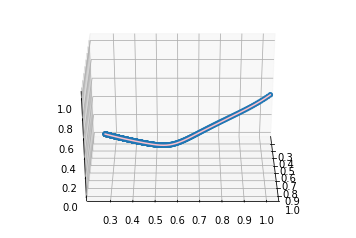

In [396]:
ρ = 1; σ = 10; β = 8/3
Y = L_RK4(a,b,α,N)
fig = plt.figure(); ax = plt.axes(projection='3d');

# Change degrees of rotation:
ax.view_init(30,0)
ax.plot3D(Y[0],Y[1],Y[2], 'pink'); ax.scatter3D(Y[0], Y[1], Y[2])


print ("Tested ρ:", ρ); print ("Tested σ:", σ); print ("Tested β:", β)
xavg = 0; yavg = 0; zavg = 0
print("---------------------------------")
for i in range(1990,2001):
    print("X(", i, ") = ", Y[0][i])
    xavg = xavg + Y[0][i]

print("---------------------------------")
for i in range(1990,2001):
    print("Y(", i, ") = ", Y[1][i])
    yavg = yavg + Y[1][i]
    
print("---------------------------------")
    
for i in range(1990,2001):
    print("Z(", i, ") = ", Y[2][i])
    zavg = zavg + Y[2][i]
    
xavg = xavg/11; yavg = yavg/11; zavg = zavg/11
print("---------------------------------")
print ("Average X Value: ", xavg); print("Average Y Value: ", yavg); print("Average Z Value: ", zavg)

<b> Lorenz Equations Case 2 -  0 < ρ < 1 </b>
    $$ \rho = 0.5,  \sigma = 10,  \beta = 8/3 $$

Tested ρ: 0.5
Tested σ: 10
Tested β: 2.6666666666666665


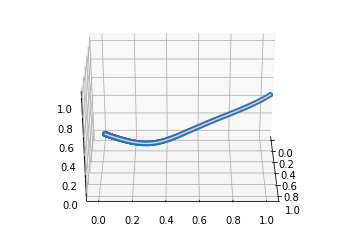

In [397]:
ρ = 0.5
Y = L_RK4(a,b,α,N)
fig = plt.figure(); ax = plt.axes(projection='3d');

# Change degrees of rotation:
ax.view_init(30,0)
ax.plot3D(Y[0],Y[1],Y[2], 'pink'); ax.scatter3D(Y[0], Y[1], Y[2])


print ("Tested ρ:", ρ); print ("Tested σ:", σ); print ("Tested β:", β)

<b> Lorenz Equations Case 3 -  0 < ρ < 20 </b>
    $$ \rho = 10,  \sigma = 10,  \beta = 8/3 $$

Tested ρ: 10
Tested σ: 10
Tested β: 2.6666666666666665


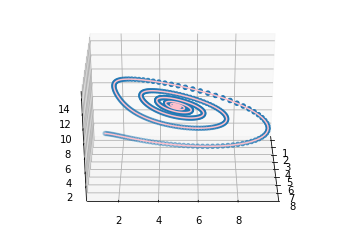

In [398]:
ρ = 10
Y = L_RK4(a,b,α,N)
fig = plt.figure(); ax = plt.axes(projection='3d');

# Change degrees of rotation:
ax.view_init(30,0)
ax.plot3D(Y[0],Y[1],Y[2], 'pink'); ax.scatter3D(Y[0], Y[1], Y[2])


print ("Tested ρ:", ρ); print ("Tested σ:", σ); print ("Tested β:", β)

In [399]:
π = math.pi
q = π/(math.sqrt(2))

ψ = lambda x,z,t: Y[0][t]*math.cos(π*z)*math.sin(q*x)
θ = lambda x,z,t: Y[1][t]*math.cos(π*z)*math.sin(q*x) + Y[2][t]*math.sin(2*π*z)

print(ψ(1,1,1))

-0.7987667141949882


In [400]:
box = widgets.VBox(children=[widgets.FloatText(description='ρ'), widgets.FloatText(description='σ'), widgets.FloatText(description='β')])
tab_nest = widgets.Tab()
tab_nest.children = [box, box]
tab_nest.set_title(0, 'Test 1')
tab_nest.set_title(1, 'Test 2')
tab_nest


In [401]:
# 10/16/2018 - Modified k_Mult; removed h from Ω calculation into return statements
# 10/18/2018 - Modified L_RK4; allocated x(t), y(t), and z(t) seperately to produce accurate results
# 10/29/2018 - Modified L_RK4 to original form, now producing expected results
# 11/07/2018 - Added individual cases for the different values of ρ
# 11/08/2018 - Began experimenting with widgets to display ρ values more effectively